## 基础包与数据导入

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r"D:\lunwen\cxx\jgs.csv", encoding='gbk')
df.info(); df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   机构数     200 non-null    float64
 1   文体      200 non-null    float64
 2   托管      200 non-null    float64
 3   学科      200 non-null    float64
 4   人口      200 non-null    float64
 5   普通小学    200 non-null    float64
 6   普通中学    200 non-null    float64
 7   生产总值    200 non-null    float64
 8   第三产业    200 non-null    float64
 9   房价      200 non-null    float64
 10  人口栅格    200 non-null    float64
 11  建成区     200 non-null    float64
 12  教育      200 non-null    float64
dtypes: float64(13)
memory usage: 20.4 KB


,机构数,文体,托管,学科,人口,普通小学,普通中学,生产总值,第三产业,房价,人口栅格,建成区,教育
0,4.143135,3.806662,0.000000,4.242641,3.837515,10.210972,9.985114,14.924205,14.128860,8.923325,13.105705,3.220211,4.812184
1,2.890372,2.484907,2.236068,1.000000,4.512616,10.546341,10.403353,15.337253,14.448855,8.833608,13.519880,3.984015,5.231109
2,2.995732,2.564949,2.000000,1.732051,4.806886,11.318430,10.388965,15.100049,14.262438,8.522778,13.765951,3.939118,5.411646
3,5.525453,5.379897,3.605551,4.582576,3.869950,10.367222,9.655026,15.830520,15.232649,8.964056,13.653294,4.502551,5.170484
4,4.077537,3.583519,3.872983,2.828427,4.891251,11.466882,10.954082,15.259012,14.602967,9.144841,13.741540,3.053828,5.624018


In [3]:
df = pd.read_csv(r"D:\lunwen\cxx\jgs.csv")
df.info(); df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 0: invalid start byte

## 多元线性回归建模

In [5]:
from statsmodels.formula.api import ols

In [6]:
lm = ols('机构数~人口+普通小学+普通中学+生产总值+第三产业+房价+建成区+教育', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    机构数   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     81.00
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.00e-57
Time:                        16:54:57   Log-Likelihood:                -160.85
No. Observations:                 200   AIC:                             339.7
Df Residuals:                     191   BIC:                             369.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9722      1.471     -7.459      0.000     -13.874      -8.071
人口            -0.5475      0.182     -3.013      0.003      -0.906      -0.189
普通小学           0.4478      0.154      2.911      0.004       0.144       0.751
普通中学          -0.1851      0.096     -1.920      0.056      -0.375       0.005
生产总值           0.3526      0.233      1.511      0.132      -0.108       0.813
第三产业           0.5875      0.211      2.787      0.006       0.172       1.003
房价             0.0126      0.125      0.101      0.920      -0.233       0.258
建成区            0.0599      0.050      1.190      0.235      -0.039       0.159
教育             0.0193      0.138      0.140      0.889      -0.252       0.291
==============================================================================
Omnibus:                        0.693   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.810
Skew:                           0.124   Prob(JB):                        0.667
Kurtosis:                       2.812   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 处理多元共线性

In [7]:
# df1=df.drop(["NSSR","SR","Td"],axis=1)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

def heatmap(data, method='pearson', camp='Blues', figsize=(20,20)):
    """
    data: 整份数据
    method：默认为 pearson 系数
    camp：默认为：RdYlGn-红黄蓝；YlGnBu-黄绿蓝；Blues/Greens 也是不错的选择
    figsize: 默认为 10，8
    """
    # 设置中文字体
    font = FontProperties(fname=r'C:\WINDOWS\Fonts\simsun.ttc', size=14)  # 使用宋体

    plt.figure(figsize=figsize, dpi=300)
    ax = sns.heatmap(data.corr(method=method),
                     xticklabels=data.corr(method=method).columns,
                     yticklabels=data.corr(method=method).columns, cmap=camp,
                     center=0, annot=True, fmt='.2g', annot_kws={"fontsize":13})
    
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)

    # 应用中文字体
    plt.xticks(fontsize=15, fontproperties=font)
    plt.yticks(fontsize=15, fontproperties=font)

    # 显示热力图
    plt.show()

# 调用函数时传入你的 DataFrame，比如：
# heatmap(data=df, figsize=(20, 20))

In [15]:
# 热力图 
def heatmap(data, method='pearson', camp='Blues', figsize=(20,20)):
    """
    data: 整份数据
    method：默认为 pearson 系数
    camp：默认为：RdYlGn-红黄蓝；YlGnBu-黄绿蓝；Blues/Greens 也是不错的选择
    figsize: 默认为 10，8
    """
    # 消除斜对角颜色重复的色块
#     mask = np.zeros_like(df1.corr())
#     mask[np.tril_indices_from(mask)] = True
    plt.figure(figsize=figsize, dpi= 300)
    ax = sns.heatmap(data.corr(method=method), \
                xticklabels=data.corr(method=method).columns, \
                yticklabels=data.corr(method=method).columns, cmap=camp, \
                center=0, annot=True,fmt='.2g',annot_kws={"fontsize":13})
    # 要想实现只是留下对角线一半的效果，括号内的参数可以加上 mask=mask
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    import matplotlib.pyplot as plt

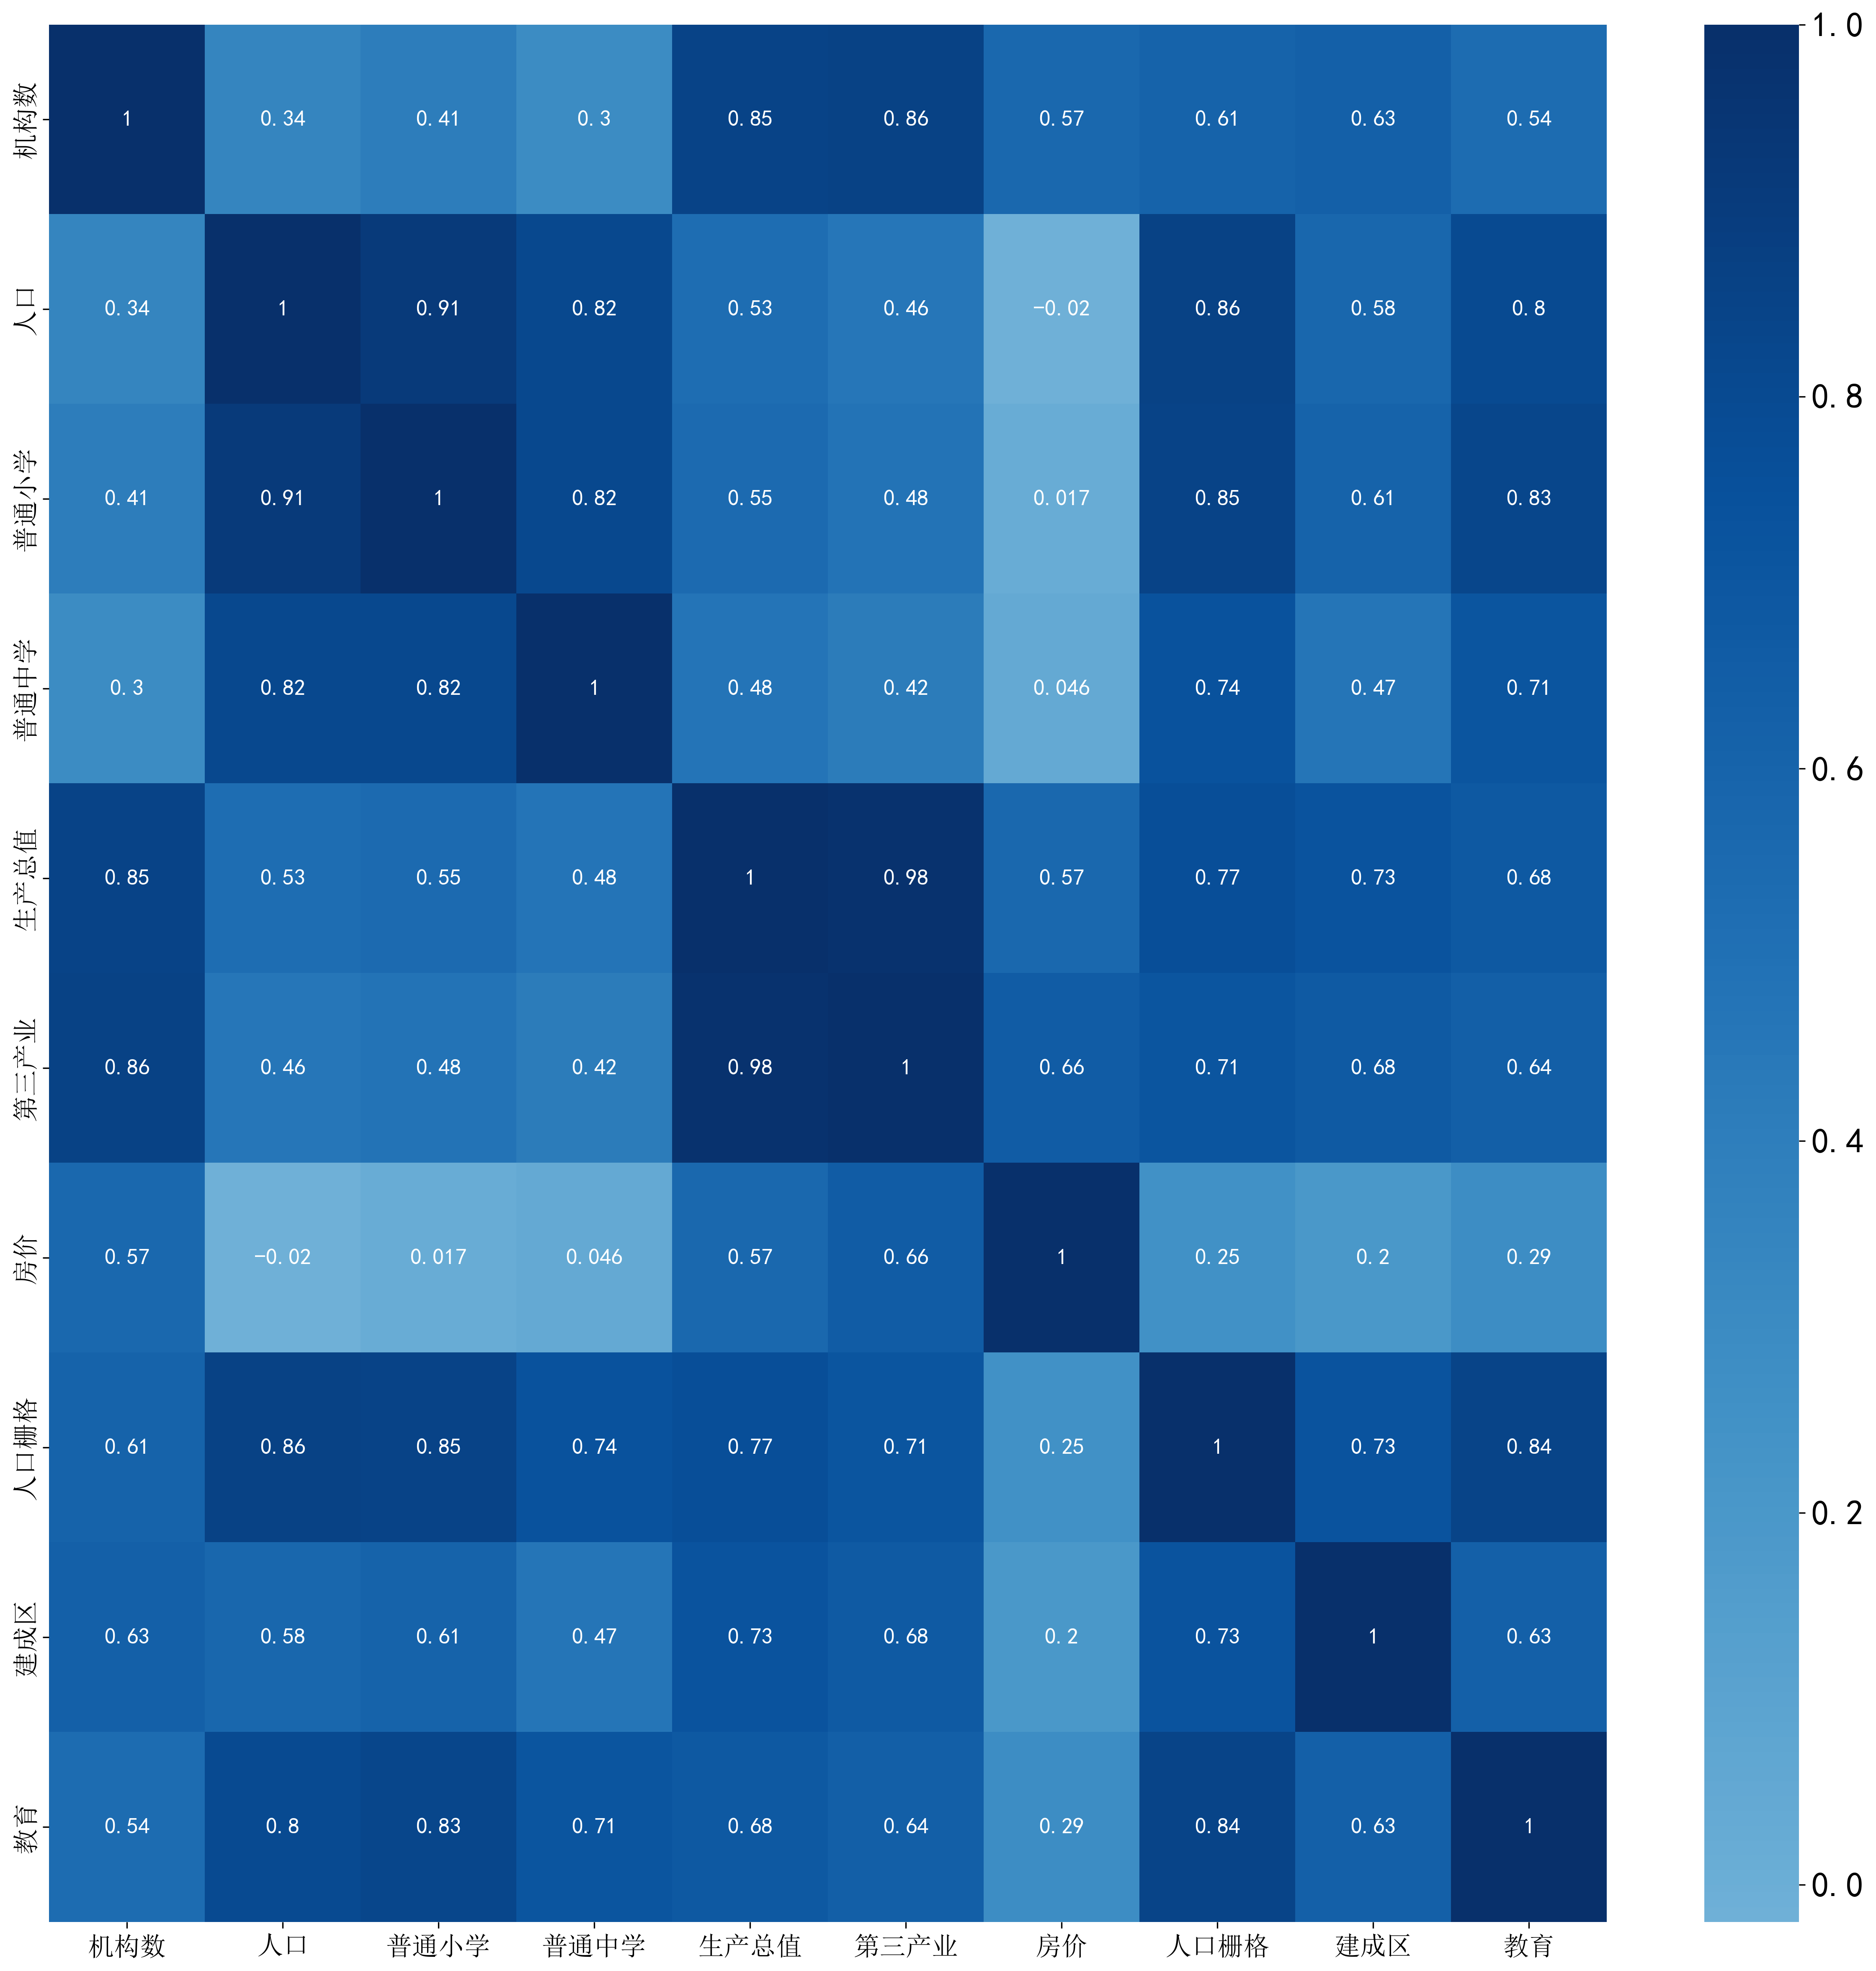

<Figure size 432x288 with 0 Axes>

In [17]:
# 探究相关性
heatmap(data=df, figsize=(20,20))
plt.savefig(r'D:\lunwen\cxx\jgs.jpg',dpi=300)

In [10]:
# 发现 bedrooms 和 bathrooms 存在强相关性，可能这两个变量是解释同一个问题
 ## 自定义方差膨胀因子的检测公式
def vif(df, col_i):
    """
    df: 整份数据
    col_i：被检测的列名
    """
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2) 


In [11]:
test_data = df[["机构数","人口","普通小学","普通中学","生产总值","第三产业","房价","建成区","教育"]]
for i in test_data.columns:
    print(i, '\t', vif(df=test_data, col_i=i))

机构数 	 4.392545539945592
人口 	 7.763429238995496
普通小学 	 8.569450390182565
普通中学 	 3.5067939067064677
生产总值 	 32.56783616251365
第三产业 	 35.26366690997635
房价 	 3.098297525436126
建成区 	 2.7791015359724045
教育 	 4.821549410146739


In [15]:
# 发现 bedrooms 和 bathrooms 存在强相关性，可能这两个变量是解释同一个问题
 ## 自定义方差膨胀因子的检测公式
def vif(df, col_i):
    """
    df: 整份数据
    col_i：被检测的列名
    """
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [16]:
test_data = df[["lon","lat","Date","Tm2","NDVI","UW","VW","BH","Tor_O3","SP","NT","RH","TP","TC","TE","PM25","VOC","NLM","MPD","DEM"]]
for i in test_data.columns:
    print(i, '\t', vif(df=test_data, col_i=i))

lon 	 2.411228810583587
lat 	 2.081316588393408
Date 	 2.245170811890666
Tm2 	 4.089876584560721
NDVI 	 1.4517144239160054
UW 	 1.1385960109750597
VW 	 1.419022930052256
BH 	 1.3681126497730776
Tor_O3 	 2.253010469449883
SP 	 3.1596726843727887
NT 	 2.0263873440850855
RH 	 2.2035535249503573
TP 	 1.3422884128500991
TC 	 1.5466218957898192
TE 	 2.7194796263559855
PM25 	 2.9916646698786495
VOC 	 4.208412941324699
NLM 	 2.694031396136104
MPD 	 1.2166794722230385
DEM 	 1.7706405164783245


In [17]:
# 果然，bedrooms 和 bathrooms 这两个变量的方差膨胀因子较高，
 # 也印证了方差膨胀因子大多成对出现的原则，这里我们丢弃膨胀因子较大的 bedrooms 即可
lm = ols(formula='O3 ~ lon+lat+Date+Tm2+NDVI+UW+VW+BH+Tor_O3+SP+NT+RH+TP+TC+TE+PM25+VOC+NLM+MPD+DEM', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:44:25   Log-Likelihood:            -7.5216e+05
No. Observations:              155090   AIC:                         1.504e+06
Df Residuals:                  155069   BIC:                         1.505e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -245.0961     11.955    -20.502      0.000    -268.528    -221.665
lon            1.5121      0.064     23.478      0.000       1.386       1.638
lat            1.6215      0.034     47.620      0.000       1.555       1.688
Date          -0.0564      0.001    -50.671      0.000      -0.059      -0.054
Tm2            2.8425      0.017    171.441      0.000       2.810       2.875
NDVI           8.5625      0.384     22.270      0.000       7.809       9.316
UW            -4.1374      0.058    -70.812      0.000      -4.252      -4.023
VW            -0.1647      0.045     -3.692      0.000      -0.252      -0.077
BH             0.0019      0.000      3.960      0.000       0.001       0.003
Tor_O3        94.6103      8.598     11.003      0.000      77.758     111.463
SP             0.0003   9.16e-05      3.190      0.001       0.000       0.000
NT         -7.826e-06   4.73e-08   -165.508      0.000   -7.92e-06   -7.73e-06
RH             0.0168      0.007      2.342      0.019       0.003       0.031
TP          -231.4084     10.993    -21.050      0.000    -252.955    -209.862
TC            -4.4762      0.318    -14.084      0.000      -5.099      -3.853
TE         -2933.7782     85.458    -34.330      0.000   -3101.274   -2766.282
PM25           0.0025      0.001      4.053      0.000       0.001       0.004
VOC            0.0001   6.94e-05      1.699      0.089   -1.81e-05       0.000
NLM            0.1618      0.013     12.199      0.000       0.136       0.188
MPD        -7.604e-05   8.82e-06     -8.622      0.000   -9.33e-05   -5.88e-05
DEM            0.0019      0.001      1.700      0.089      -0.000       0.004
==============================================================================
Omnibus:                     8471.272   Durbin-Watson:                   0.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16916.095
Skew:                           0.394   Prob(JB):                         0.00
Kurtosis:                       4.413   Cond. No.                     5.93e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
test_data = df[["lon","lat","Date","Tm2","NDVI","UW","VW","BH","Tor_O3","SP","NT","RH","TP","TC","TE","PM25","VOC","NLM","MPD","DEM"]]
for i in test_data.columns:
    print(i, '\t', vif(df=test_data, col_i=i))

lon 	 2.411228810583587
lat 	 2.081316588393408
Date 	 2.245170811890666
Tm2 	 4.089876584560721
NDVI 	 1.4517144239160054
UW 	 1.1385960109750597
VW 	 1.419022930052256
BH 	 1.3681126497730776
Tor_O3 	 2.253010469449883
SP 	 3.1596726843727887
NT 	 2.0263873440850855
RH 	 2.2035535249503573
TP 	 1.3422884128500991
TC 	 1.5466218957898192
TE 	 2.7194796263559855
PM25 	 2.9916646698786495
VOC 	 4.208412941324699
NLM 	 2.694031396136104
MPD 	 1.2166794722230385
DEM 	 1.7706405164783245


In [19]:
# 精度没变，但具体问题还是需要结合具体业务来分析

In [43]:
# 果然，bedrooms 和 bathrooms 这两个变量的方差膨胀因子较高，
 # 也印证了方差膨胀因子大多成对出现的原则，这里我们丢弃膨胀因子较大的 bedrooms 即可
lm = ols(formula='O3 ~ LG+LT+DATE+TM2+NDVI+UW+VW+BH+O33+SP+NT+RH+TP+TC+TE+PM25+VOC+NLM+MPD+DEM', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:32:58   Log-Likelihood:            -7.5220e+05
No. Observations:              155099   AIC:                         1.504e+06
Df Residuals:                  155078   BIC:                         1.505e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -930.2557     14.101    -65.970      0.000    -957.894    -902.618
LG             1.5129      0.064     23.492      0.000       1.387       1.639
LT             1.6219      0.034     47.636      0.000       1.555       1.689
DATE          -0.0564      0.001    -50.668      0.000      -0.059      -0.054
TM2            5.1164      0.030    171.445      0.000       5.058       5.175
NDVI           8.5627      0.384     22.271      0.000       7.809       9.316
UW            -4.1383      0.058    -70.832      0.000      -4.253      -4.024
VW            -0.1651      0.045     -3.700      0.000      -0.252      -0.078
BH             0.0019      0.000      3.957      0.000       0.001       0.003
O33           94.6381      8.598     11.007      0.000      77.787     111.490
SP             0.0003   9.16e-05      3.192      0.001       0.000       0.000
NT         -7.826e-06   4.73e-08   -165.510      0.000   -7.92e-06   -7.73e-06
RH             0.0167      0.007      2.333      0.020       0.003       0.031
TP          -231.1963     10.992    -21.032      0.000    -252.741    -209.651
TC            -4.4779      0.318    -14.089      0.000      -5.101      -3.855
TE         -2935.0453     85.449    -34.349      0.000   -3102.523   -2767.567
PM25           0.0025      0.001      4.054      0.000       0.001       0.004
VOC            0.0001   6.94e-05      1.697      0.090   -1.83e-05       0.000
NLM            0.1617      0.013     12.191      0.000       0.136       0.188
MPD        -7.599e-05   8.82e-06     -8.617      0.000   -9.33e-05   -5.87e-05
DEM            0.0020      0.001      1.704      0.088      -0.000       0.004
==============================================================================
Omnibus:                     8472.532   Durbin-Watson:                   0.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16917.988
Skew:                           0.394   Prob(JB):                         0.00
Kurtosis:                       4.413   Cond. No.                     5.93e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
test_data = df[["LG","LT","DATE","TM2","NDVI","UW","VW","BH","O33","SP","NT","RH","TP","TC","TE","CO","NOx","PM25","VOC","NLM","MPD","DEM"]]
for i in test_data.columns:
    print(i, '\t', vif(df=test_data, col_i=i))

LG 	 2.519133190393818
LT 	 2.2475528343284283
DATE 	 2.2728739119440204
TM2 	 4.111560713397321
NDVI 	 1.462575291619183
UW 	 1.1386452828942937
VW 	 1.4199670428611768
BH 	 1.3697096611099788
O33 	 2.2538649041311527
SP 	 3.40808443525522
NT 	 2.037298872468729
RH 	 2.20438693868673
TP 	 1.3426289669331433
TC 	 1.5479429847717703
TE 	 2.720112133305979
CO 	 16.648129885003577
NOx 	 15.314960976154133
PM25 	 12.589518686609258
VOC 	 10.803478512003831
NLM 	 3.7236855199402425
MPD 	 1.2274204671842721
DEM 	 1.774505084934367


In [49]:
df1=df.drop(["CO","NOx"],axis=1)

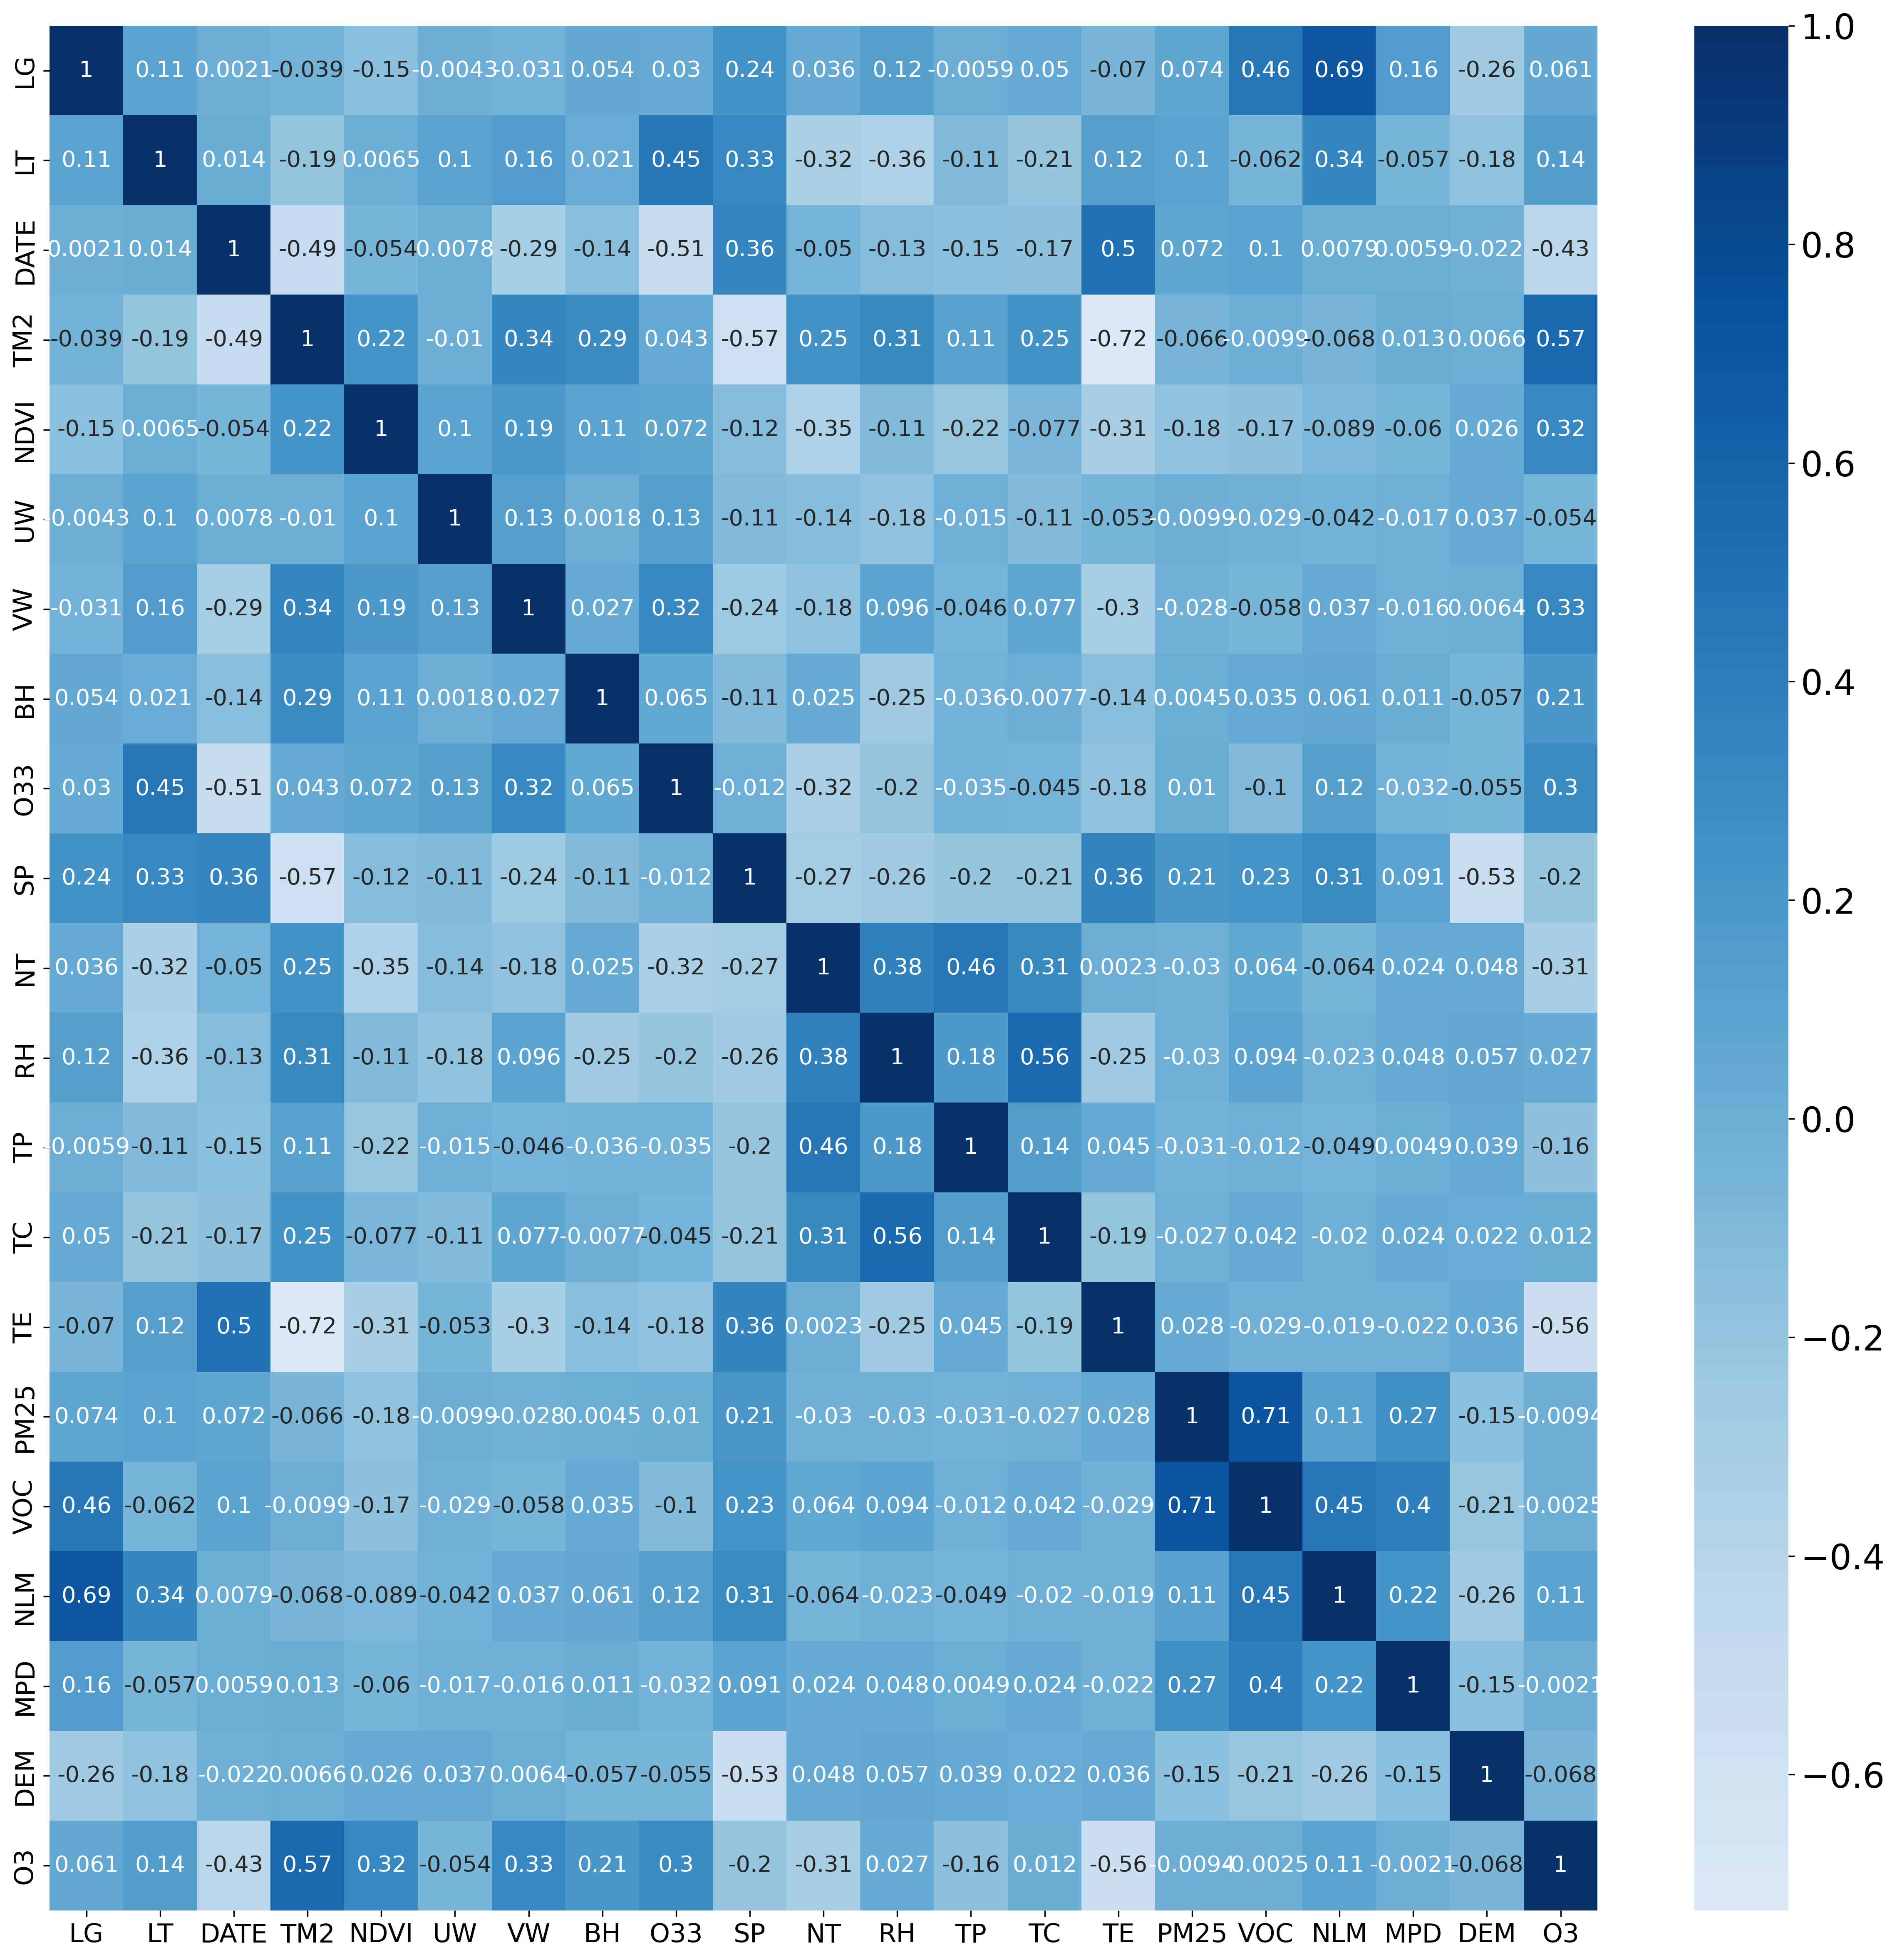

In [52]:
# 探究相关性
heatmap(data=df1, figsize=(20,20))
plt.savefig(r'D:\lunwen\pictures\相关性3.jpg',dpi=300)